In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"athlete_events.csv")
region = pd.read_csv(r"noc_regions.csv")

In [3]:
df.tail()

ID                Name Sex   Age  Height  Weight      Team  NOC  \
271111  135569          Andrzej ya   M  29.0   179.0    89.0  Poland-1  POL   
271112  135570            Piotr ya   M  27.0   176.0    59.0    Poland  POL   
271113  135570            Piotr ya   M  27.0   176.0    59.0    Poland  POL   
271114  135571  Tomasz Ireneusz ya   M  30.0   185.0    96.0    Poland  POL   
271115  135571  Tomasz Ireneusz ya   M  34.0   185.0    96.0    Poland  POL   

              Games  Year  Season            City        Sport  \
271111  1976 Winter  1976  Winter       Innsbruck         Luge   
271112  2014 Winter  2014  Winter           Sochi  Ski Jumping   
271113  2014 Winter  2014  Winter           Sochi  Ski Jumping   
271114  1998 Winter  1998  Winter          Nagano    Bobsleigh   
271115  2002 Winter  2002  Winter  Salt Lake City    Bobsleigh   

                                           Event Medal  
271111                Luge Mixed (Men)'s Doubles   NaN  
271112  Ski Jumping Men's Large Hill, Individual   NaN  
271113        Ski Jumping Men's Large Hill, Team   NaN  
271114                      Bobsleigh Men's Four   NaN  
271115                      Bobsleigh Men's Four   NaN

In [4]:
df=df[df['Season']=='Summer']

In [5]:
df.shape

(222552, 15)

In [6]:
df.head(3)

ID                 Name Sex   Age  Height  Weight     Team  NOC  \
0   1            A Dijiang   M  24.0   180.0    80.0    China  CHN   
1   2             A Lamusi   M  23.0   170.0    60.0    China  CHN   
2   3  Gunnar Nielsen Aaby   M  24.0     NaN     NaN  Denmark  DEN   

         Games  Year  Season       City       Sport  \
0  1992 Summer  1992  Summer  Barcelona  Basketball   
1  2012 Summer  2012  Summer     London        Judo   
2  1920 Summer  1920  Summer  Antwerpen    Football   

                          Event Medal  
0   Basketball Men's Basketball   NaN  
1  Judo Men's Extra-Lightweight   NaN  
2       Football Men's Football   NaN

GroupBy NOC to find Medal Tally

In [7]:
region.head()

NOC       region                 notes
0  AFG  Afghanistan                   NaN
1  AHO      Curacao  Netherlands Antilles
2  ALB      Albania                   NaN
3  ALG      Algeria                   NaN
4  AND      Andorra                   NaN

In [8]:
df = df.merge(region,on='NOC',how='left')

In [9]:
df.head()

ID                                Name Sex   Age  Height  Weight  \
0   1                           A Dijiang   M  24.0   180.0    80.0   
1   2                            A Lamusi   M  23.0   170.0    60.0   
2   3                 Gunnar Nielsen Aaby   M  24.0     NaN     NaN   
3   4                Edgar Lindenau Aabye   M  34.0     NaN     NaN   
4   8  Cornelia "Cor" Aalten (-Strannood)   F  18.0   168.0     NaN   

             Team  NOC        Games  Year  Season         City       Sport  \
0           China  CHN  1992 Summer  1992  Summer    Barcelona  Basketball   
1           China  CHN  2012 Summer  2012  Summer       London        Judo   
2         Denmark  DEN  1920 Summer  1920  Summer    Antwerpen    Football   
3  Denmark/Sweden  DEN  1900 Summer  1900  Summer        Paris  Tug-Of-War   
4     Netherlands  NED  1932 Summer  1932  Summer  Los Angeles   Athletics   

                          Event Medal       region notes  
0   Basketball Men's Basketball   NaN        China   NaN  
1  Judo Men's Extra-Lightweight   NaN        China   NaN  
2       Football Men's Football   NaN      Denmark   NaN  
3   Tug-Of-War Men's Tug-Of-War  Gold      Denmark   NaN  
4  Athletics Women's 100 metres   NaN  Netherlands   NaN

In [10]:
df.region.unique()

array(['China', 'Denmark', 'Netherlands', 'Finland', 'Norway', 'Romania',
       'Estonia', 'France', 'Morocco', 'Spain', 'Egypt', 'Iran',
       'Bulgaria', 'Italy', 'Chad', 'Azerbaijan', 'Sudan', 'Russia',
       'Argentina', 'Cuba', 'Belarus', 'Greece', 'Cameroon', 'Turkey',
       'Chile', 'Mexico', 'USA', 'Nicaragua', 'Hungary', 'Nigeria',
       'Algeria', 'Kuwait', 'Bahrain', 'Pakistan', 'Iraq', 'Syria',
       'Lebanon', 'Qatar', 'Malaysia', 'Germany', 'Canada', 'Ireland',
       'Australia', 'South Africa', 'Eritrea', 'Tanzania', 'Jordan',
       'Tunisia', 'Libya', 'Belgium', 'Djibouti', 'Palestine', 'Comoros',
       'Kazakhstan', 'Brunei', 'India', 'Saudi Arabia', 'Maldives',
       'Ethiopia', 'United Arab Emirates', 'Yemen', 'Indonesia',
       'Philippines', nan, 'Uzbekistan', 'Kyrgyzstan', 'Tajikistan',
       'Japan', 'Republic of Congo', 'Switzerland', 'Brazil', 'Monaco',
       'Israel', 'Uruguay', 'Sweden', 'Sri Lanka', 'Armenia',
       'Ivory Coast', 'Kenya', 'Ben

In [11]:
df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9189
Height     51857
Weight     53854
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     188464
region       370
notes     218151
dtype: int64

In [12]:
df[df.duplicated()].head()

ID                    Name Sex   Age  Height  Weight           Team  \
1066   704      Dsir Antoine Acket   M  27.0     NaN     NaN        Belgium   
3772  2449  William Truman Aldrich   M  48.0     NaN     NaN  United States   
3773  2449  William Truman Aldrich   M  48.0     NaN     NaN  United States   
4307  2777  Hermann Reinhard Alker   M  43.0     NaN     NaN        Germany   
4309  2777  Hermann Reinhard Alker   M  43.0     NaN     NaN        Germany   

      NOC        Games  Year  Season         City             Sport  \
1066  BEL  1932 Summer  1932  Summer  Los Angeles  Art Competitions   
3772  USA  1928 Summer  1928  Summer    Amsterdam  Art Competitions   
3773  USA  1928 Summer  1928  Summer    Amsterdam  Art Competitions   
4307  GER  1928 Summer  1928  Summer    Amsterdam  Art Competitions   
4309  GER  1928 Summer  1928  Summer    Amsterdam  Art Competitions   

                                                  Event Medal   region notes  
1066     Art Competitions Mixed Painting, Unknown Event   NaN  Belgium   NaN  
3772  Art Competitions Mixed Painting, Drawings And ...   NaN      USA   NaN  
3773  Art Competitions Mixed Painting, Drawings And ...   NaN      USA   NaN  
4307  Art Competitions Mixed Architecture, Designs F...   NaN  Germany   NaN  
4309  Art Competitions Mixed Architecture, Architect...   NaN  Germany   NaN

In [13]:
df.duplicated().sum()

1385

In [14]:
df.drop_duplicates(inplace=True)

In [15]:
df.duplicated().sum()

0

In [16]:
df['Medal'].unique()

array([nan, 'Gold', 'Bronze', 'Silver'], dtype=object)

In [17]:
df['Medal'].value_counts()

Gold      11456
Bronze    11409
Silver    11212
Name: Medal, dtype: int64

In [18]:
pd.get_dummies(df['Medal'])

Bronze  Gold  Silver
0            0     0       0
1            0     0       0
2            0     0       0
3            0     1       0
4            0     0       0
...        ...   ...     ...
222547       0     0       0
222548       0     0       0
222549       0     0       0
222550       0     0       0
222551       0     0       0

[221167 rows x 3 columns]

In [19]:
df = pd.concat([df,pd.get_dummies(df['Medal'])],axis=1)

In [20]:
df.groupby('NOC').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending=False).reset_index()

NOC    Gold  Silver  Bronze
0    USA  2472.0  1333.0  1197.0
1    URS   832.0   635.0   596.0
2    GBR   635.0   729.0   620.0
3    GER   592.0   538.0   649.0
4    ITA   518.0   474.0   454.0
..   ...     ...     ...     ...
225  AHO     0.0     1.0     0.0
226  LBR     0.0     0.0     0.0
227  LCA     0.0     0.0     0.0
228  LES     0.0     0.0     0.0
229  LBA     0.0     0.0     0.0

[230 rows x 4 columns]

Now this data is totally different from the original figures,as this takes into account each gold medal won by an individual of a team match

For Ex if there are 11 players in the winning team like in games such as hockey then it takes it account 11 gold medals and not as 1 Gold Medal individually

*So the solution is to delete the duplicate rows on the basis of Teams,NOC,Games,Year,Season,City*

In [21]:
medal_tally = df.drop_duplicates(subset=['Team','NOC','Games','Year','City','Sport','Event','Medal'])

In [22]:
medal_tally = medal_tally.groupby('NOC').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending=False).reset_index()

In [23]:
medal_tally['total'] = medal_tally['Gold'] + medal_tally['Silver'] + medal_tally['Bronze']

In [24]:
medal_tally

NOC    Gold  Silver  Bronze   total
0    USA  1035.0   802.0   708.0  2545.0
1    URS   394.0   317.0   294.0  1005.0
2    GBR   278.0   317.0   300.0   895.0
3    GER   235.0   261.0   283.0   779.0
4    FRA   234.0   256.0   287.0   777.0
..   ...     ...     ...     ...     ...
225  AHO     0.0     1.0     0.0     1.0
226  LBR     0.0     0.0     0.0     0.0
227  LCA     0.0     0.0     0.0     0.0
228  LES     0.0     0.0     0.0     0.0
229  LBA     0.0     0.0     0.0     0.0

[230 rows x 5 columns]

In [25]:
years = df['Year'].unique().tolist()

In [26]:
years.sort()

In [27]:
years.insert(0,'Overall')

In [28]:
years

['Overall',
 1896,
 1900,
 1904,
 1906,
 1908,
 1912,
 1920,
 1924,
 1928,
 1932,
 1936,
 1948,
 1952,
 1956,
 1960,
 1964,
 1968,
 1972,
 1976,
 1980,
 1984,
 1988,
 1992,
 1996,
 2000,
 2004,
 2008,
 2012,
 2016]

In [29]:
country = df['region'].unique().tolist()

In [30]:
country = np.unique(df['region'].dropna().values).tolist()

In [31]:
country

['Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Antigua',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Boliva',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Cook Islands',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czech Republic',
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guam',
 'Guatemala',
 'Guinea',
 'Guin

In [32]:
country.insert(0,'Overall')

In [33]:
medal_tally.head()

NOC    Gold  Silver  Bronze   total
0  USA  1035.0   802.0   708.0  2545.0
1  URS   394.0   317.0   294.0  1005.0
2  GBR   278.0   317.0   300.0   895.0
3  GER   235.0   261.0   283.0   779.0
4  FRA   234.0   256.0   287.0   777.0

In [34]:
medal_df = df.drop_duplicates(subset=['Team','NOC','Games','Year','City','Sport','Event','Medal'])

In [35]:
medal_df.head()

ID                                Name Sex   Age  Height  Weight  \
0   1                           A Dijiang   M  24.0   180.0    80.0   
1   2                            A Lamusi   M  23.0   170.0    60.0   
2   3                 Gunnar Nielsen Aaby   M  24.0     NaN     NaN   
3   4                Edgar Lindenau Aabye   M  34.0     NaN     NaN   
4   8  Cornelia "Cor" Aalten (-Strannood)   F  18.0   168.0     NaN   

             Team  NOC        Games  Year  Season         City       Sport  \
0           China  CHN  1992 Summer  1992  Summer    Barcelona  Basketball   
1           China  CHN  2012 Summer  2012  Summer       London        Judo   
2         Denmark  DEN  1920 Summer  1920  Summer    Antwerpen    Football   
3  Denmark/Sweden  DEN  1900 Summer  1900  Summer        Paris  Tug-Of-War   
4     Netherlands  NED  1932 Summer  1932  Summer  Los Angeles   Athletics   

                          Event Medal       region notes  Bronze  Gold  Silver  
0   Basketball Men's Basketball   NaN        China   NaN       0     0       0  
1  Judo Men's Extra-Lightweight   NaN        China   NaN       0     0       0  
2       Football Men's Football   NaN      Denmark   NaN       0     0       0  
3   Tug-Of-War Men's Tug-Of-War  Gold      Denmark   NaN       0     1       0  
4  Athletics Women's 100 metres   NaN  Netherlands   NaN       0     0       0

In [36]:
def fetch_medal_tally(df,year,country):
    medal_df = df.drop_duplicates(subset=['Team','NOC','Games','Year','City','Sport','Event','Medal'])
    flag=0
    if year=='Overall' and country=='Overall':
        temp_df = medal_df
    if year=='Overall' and country !='Overall':  #year wise performance not related to any country
        flag=1
        temp_df = medal_df[medal_df['region']== country]
    if year !='Overall' and country =='Overall':  #country wise performance not related to any year
        temp_df = medal_df[medal_df['Year']==int(year)]
    if year !='Overall' and country !='Overall':
        temp_df = medal_df[(medal_df['Year']==int(year)) & (medal_df['region']==country)]
    
    if flag==1:
        x = temp_df.groupby('Year').sum()[['Gold','Silver','Bronze']].sort_values('Year',ascending=False).reset_index()    
        
    else:
        x = temp_df.groupby('region').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending=False).reset_index()    
    x['total']=x['Gold']+x['Silver']+x['Bronze']
    
    print(x)

In [37]:
fetch_medal_tally(df,year='Overall',country='France')

    Year  Gold  Silver  Bronze  total
0   2016    10      18      14     42
1   2012    11      11      13     35
2   2008     7      16      18     41
3   2004    11       9      13     33
4   2000    13      14      11     38
5   1996    15       7      15     37
6   1992     8       5      16     29
7   1988     6       4       6     16
8   1984     5       7      16     28
9   1980     6       5       3     14
10  1976     2       3       4      9
11  1972     2       4       7     13
12  1968     7       3       5     15
13  1964     1       8       6     15
14  1960     0       2       3      5
15  1956     4       4       6     14
16  1952     6       6       6     18
17  1948    11       6      15     32
18  1936     7       6       6     19
19  1932    11       5       4     20
20  1928     7      12       6     25
21  1924    14      14      12     40
22  1920     9      20      13     42
23  1912     7       5       3     15
24  1908     5       5       9     19
25  1906    

# Overall Analysis
- No of editions
- No of cities
- No of events/sports
- No of atheletes
- participating nations

In [38]:
df.head(2)

ID       Name Sex   Age  Height  Weight   Team  NOC        Games  Year  \
0   1  A Dijiang   M  24.0   180.0    80.0  China  CHN  1992 Summer  1992   
1   2   A Lamusi   M  23.0   170.0    60.0  China  CHN  2012 Summer  2012   

   Season       City       Sport                         Event Medal region  \
0  Summer  Barcelona  Basketball   Basketball Men's Basketball   NaN  China   
1  Summer     London        Judo  Judo Men's Extra-Lightweight   NaN  China   

  notes  Bronze  Gold  Silver  
0   NaN       0     0       0  
1   NaN       0     0       0

In [39]:
df['Year'].unique().shape[0]-1

28

In [40]:
df['City'].unique()

array(['Barcelona', 'London', 'Antwerpen', 'Paris', 'Los Angeles',
       'Helsinki', 'Sydney', 'Atlanta', 'Stockholm', 'Beijing',
       'Rio de Janeiro', 'Athina', 'Mexico City', 'Munich', 'Seoul',
       'Berlin', 'Melbourne', 'Roma', 'Amsterdam', 'Montreal', 'Moskva',
       'Tokyo', 'St. Louis'], dtype=object)

In [41]:
df['Sport'].unique()

array(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Athletics',
       'Swimming', 'Badminton', 'Sailing', 'Gymnastics',
       'Art Competitions', 'Handball', 'Weightlifting', 'Wrestling',
       'Water Polo', 'Hockey', 'Rowing', 'Fencing', 'Equestrianism',
       'Shooting', 'Boxing', 'Taekwondo', 'Cycling', 'Diving', 'Canoeing',
       'Tennis', 'Modern Pentathlon', 'Golf', 'Softball', 'Archery',
       'Volleyball', 'Synchronized Swimming', 'Table Tennis', 'Baseball',
       'Rhythmic Gymnastics', 'Rugby Sevens', 'Trampolining',
       'Beach Volleyball', 'Triathlon', 'Rugby', 'Lacrosse', 'Polo',
       'Cricket', 'Ice Hockey', 'Racquets', 'Motorboating', 'Croquet',
       'Figure Skating', 'Jeu De Paume', 'Roque', 'Basque Pelota',
       'Alpinism', 'Aeronautics'], dtype=object)

In [42]:
df['Event'].unique().shape

(651,)

In [43]:
df['Name'].unique().shape

(116122,)

In [44]:
df['region'].unique().shape

(206,)

# Nations Participating over the period of Time

In [45]:
nations_over_time = df.drop_duplicates(['Year','region'])['Year'].value_counts().reset_index().sort_values('index')

In [46]:
nations_over_time=nations_over_time.rename(columns={'index':'Edition','Year':'No of Countries'})

In [47]:
nations_over_time

Edition  No of Countries
28     1896               12
22     1900               31
27     1904               14
26     1906               20
25     1908               22
24     1912               29
23     1920               29
21     1924               45
20     1928               46
19     1932               47
18     1936               49
17     1948               59
16     1952               67
15     1956               71
13     1960               83
11     1964               93
10     1968              111
9      1972              120
12     1976               91
14     1980               80
8      1984              139
7      1988              156
6      1992              168
5      1996              196
4      2000              199
3      2004              200
2      2008              202
1      2012              203
0      2016              204

Nations over Time

In [48]:
import plotly.express as px

In [49]:
fig=px.line(nations_over_time,x="Edition",y="No of Countries")
fig.show()

Overall the countries participating over the period of time are increasing but in 1980 very less nations participated because it was held in Moscow.Many nations had boycotted it as russia had attacked afghanistan

Events Held

In [50]:
nations_over_time = df.drop_duplicates(['Year','Event'])['Year'].value_counts().reset_index().sort_values('index')

In [51]:
nations_over_time=nations_over_time.rename(columns={'index':'Edition','Year':'No of Events Conducted'})

In [52]:
nations_over_time

Edition  No of Events Conducted
28     1896                      43
26     1900                      90
25     1904                      95
27     1906                      74
23     1908                     109
24     1912                     107
14     1920                     158
21     1924                     131
22     1928                     122
20     1932                     131
18     1936                     150
15     1948                     153
19     1952                     149
16     1956                     151
17     1960                     150
13     1964                     163
12     1968                     172
11     1972                     193
10     1976                     198
9      1980                     203
8      1984                     221
7      1988                     237
6      1992                     257
5      1996                     271
4      2000                     300
3      2004                     301
2      2008                     302
1      2012                     302
0      2016                     306

In [53]:
fig=px.line(nations_over_time,x="Edition",y="No of Events Conducted")
fig.show()

In [54]:
x = df.drop_duplicates(['Year','Sport','Event'])

In [55]:
x.pivot_table(index='Sport',columns='Year',values='Event',aggfunc='count').fillna(0).astype('int')

Year                   1896  1900  1904  1906  1908  1912  1920  1924  1928  \
Sport                                                                         
Aeronautics               0     0     0     0     0     0     0     0     0   
Alpinism                  0     0     0     0     0     0     0     0     0   
Archery                   0     8     6     0     3     0    10     0     0   
Art Competitions          0     0     0     0     0     5     5     5    13   
Athletics                12    23    24    21    26    30    29    27    27   
Badminton                 0     0     0     0     0     0     0     0     0   
Baseball                  0     0     0     0     0     0     0     0     0   
Basketball                0     0     0     0     0     0     0     0     0   
Basque Pelota             0     1     0     0     0     0     0     0     0   
Beach Volleyball          0     0     0     0     0     0     0     0     0   
Boxing                    0     0     7     0     5     0     8     8     8   
Canoeing                  0     0     0     0     0     0     0     0     0   
Cricket                   0     1     0     0     0     0     0     0     0   
Croquet                   0     3     0     0     0     0     0     0     0   
Cycling                   6     3     7     6     6     2     6     6     6   
Diving                    0     0     1     1     2     4     5     5     4   
Equestrianism             0     5     0     0     0     5     7     5     6   
Fencing                   3     7     5     8     4     5     6     7     7   
Figure Skating            0     0     0     0     4     0     3     0     0   
Football                  0     1     1     1     1     1     1     1     1   
Golf                      0     2     2     0     0     0     0     0     0   
Gymnastics                8     1    12     4     2     4     4     9     8   
Handball                  0     0     0     0     0     0     0     0     0   
Hockey                    0     0     0     0     1     0     1     0     1   
Ice Hockey                0     0     0     0     0     0     1     0     0   
Jeu De Paume              0     0     0     0     1     0     0     0     0   
Judo                      0     0     0     0     0     0     0     0     0   
Lacrosse                  0     0     1     0     1     0     0     0     0   
Modern Pentathlon         0     0     0     0     0     1     1     1     1   
Motorboating              0     0     0     0     3     0     0     0     0   
Polo                      0     1     0     0     1     0     1     1     0   
Racquets                  0     0     0     0     2     0     0     0     0   
Rhythmic Gymnastics       0     0     0     0     0     0     0     0     0   
Roque                     0     0     1     0     0     0     0     0     0   
Rowing                    0     4     5     6     4     4     5     7     7   
Rugby                     0     1     0     0     1     0     1     1     0   
Rugby Sevens              0     0     0     0     0     0     0     0     0   
Sailing                   0     8     0     0     4     4    10     3     3   
Shooting                  5     8     0    12    15    18    22    10     0   
Softball                  0     0     0     0     0     0     0     0     0   
Swimming                  4     7    10     4     6     9    10    11    11   
Synchronized Swimming     0     0     0     0     0     0     0     0     0   
Table Tennis              0     0     0     0     0     0     0     0     0   
Taekwondo                 0     0     0     0     0     0     0     0     0   
Tennis                    2     4     2     4     6     8     5     5     0   
Trampolining              0     0     0     0     0     0     0     0     0   
Triathlon                 0     0     0     0     0     0     0     0     0   
Tug-Of-War                0     1     1     1     1     1     1     0     0   
Volleyball                0     0     0     0     

<AxesSubplot:xlabel='Year', ylabel='Sport'>

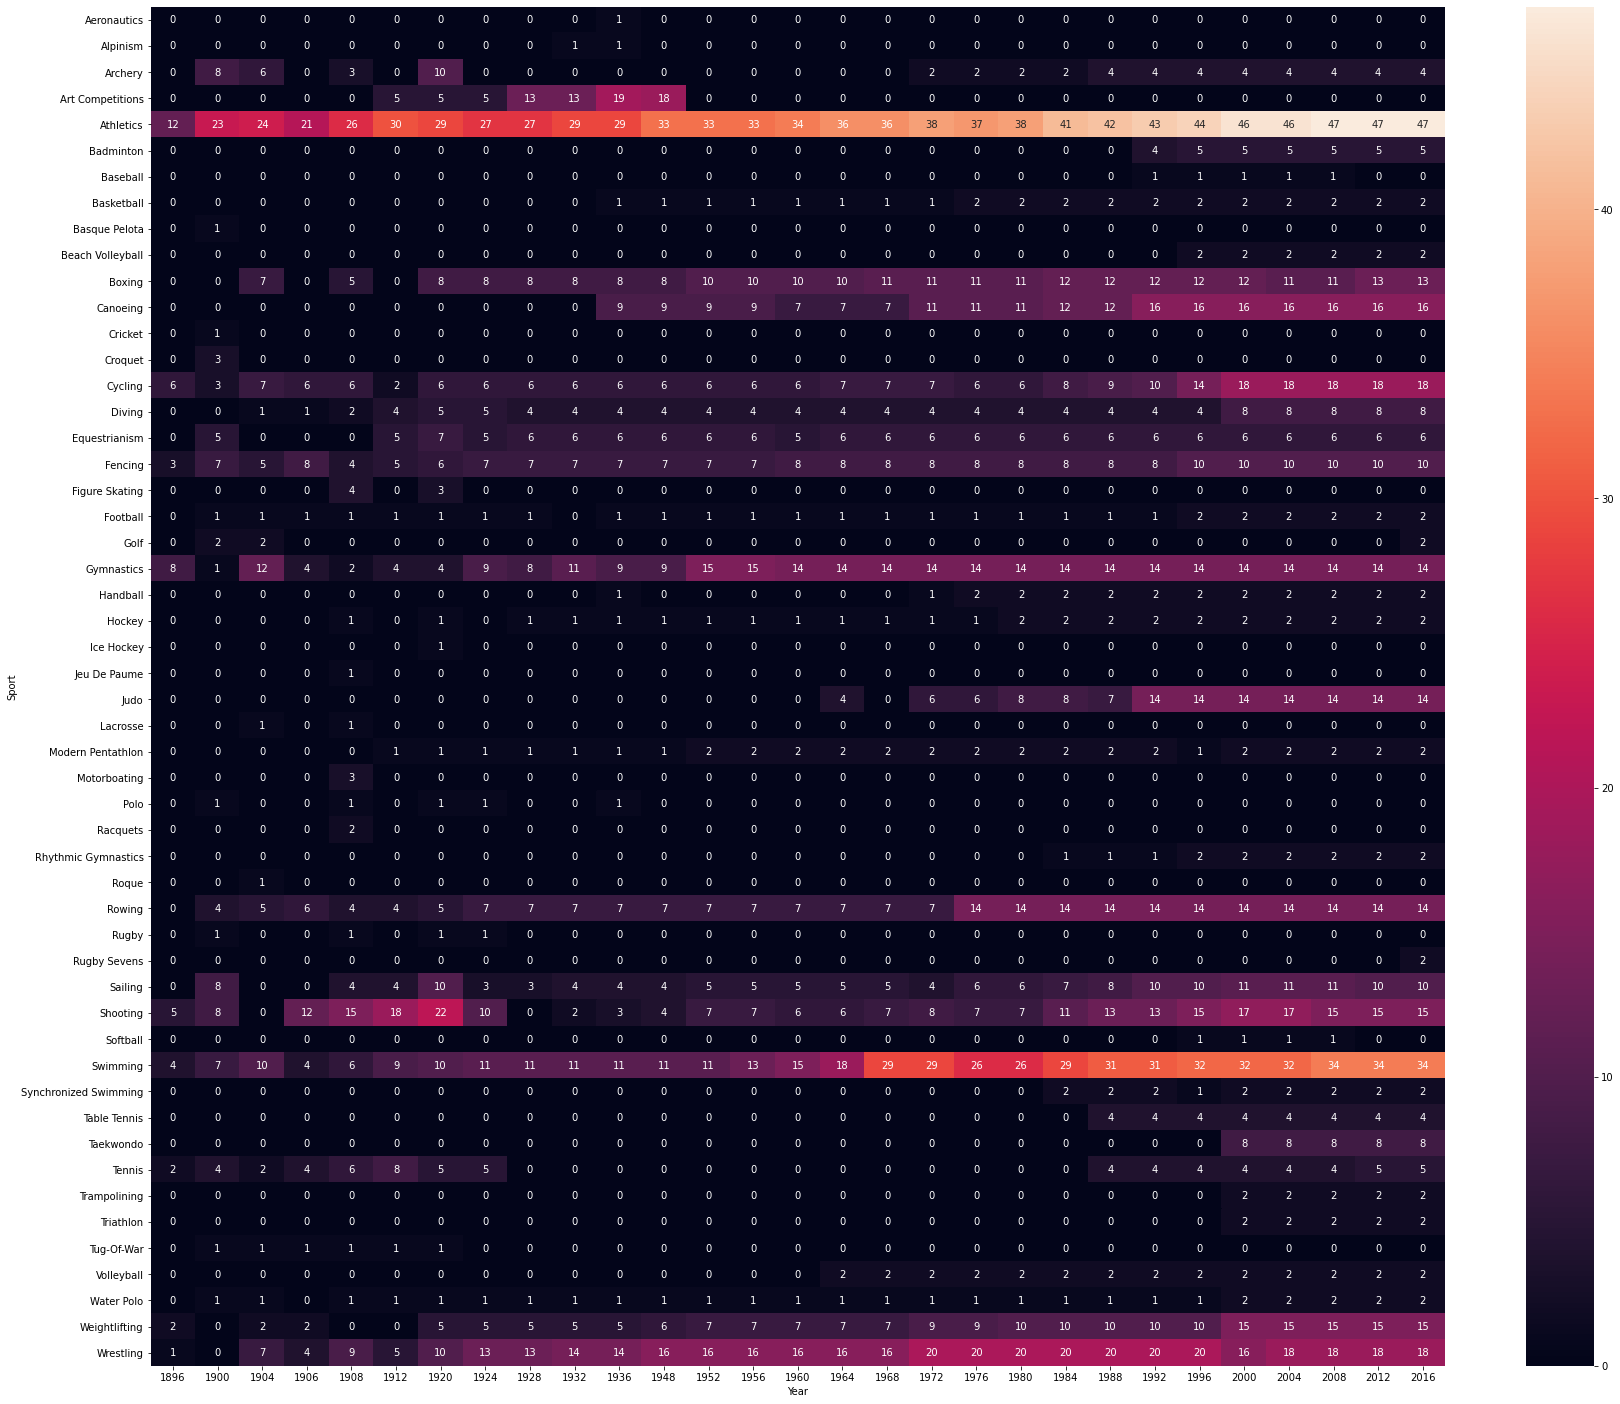

In [56]:
plt.figure(figsize=(29,25))
sns.heatmap(x.pivot_table(index='Sport',columns='Year',values='Event',aggfunc='count').fillna(0).astype('int'),annot=True)

In [57]:
def most_succesful(df,sport):
    temp_df = df.dropna(subset=['Medal'])
    
    if sport!='Overall':
        temp_df=temp_df[temp_df['Sport']==sport]
        
    x= temp_df['Name'].value_counts().reset_index().head(15).merge(df, left_on='index', right_on='Name', how='left')[
        ['index', 'Name_x', 'Sport', 'region']].drop_duplicates('index')
    x.rename(columns={'index': 'Name', 'Name_x': 'Medals'}, inplace=True)
    return x

In [58]:
most_succesful(df,'Overall')

Name  Medals       Sport  \
0                            Michael Fred Phelps, II      28    Swimming   
30                Larysa Semenivna Latynina (Diriy-)      18  Gymnastics   
49                      Nikolay Yefimovich Andrianov      15  Gymnastics   
73                               Edoardo Mangiarotti      13     Fencing   
87                                       Takashi Ono      13  Gymnastics   
120                      Borys Anfiyanovych Shakhlin      13  Gymnastics   
144  Jennifer Elisabeth "Jenny" Thompson (-Cumpelik)      12    Swimming   
161                                       Sawao Kato      12  Gymnastics   
185                               Ryan Steven Lochte      12    Swimming   
199                    Natalie Anne Coughlin (-Hall)      12    Swimming   
211                           Birgit Fischer-Schmidt      12    Canoeing   
224                             Paavo Johannes Nurmi      12   Athletics   
236                          Aleksey Yuryevich Nemov      12  Gymnastics   
257             Dara Grace Torres (-Hoffman, -Minas)      12    Swimming   
270                           Vra slavsk (-Odloilov)      11  Gymnastics   

             region  
0               USA  
30           Russia  
49           Russia  
73            Italy  
87            Japan  
120          Russia  
144             USA  
161           Japan  
185             USA  
199             USA  
211         Germany  
224         Finland  
236          Russia  
257             USA  
270  Czech Republic

# Country Wise
- Countrywise medal tally per year(line plot)
- What countries are good at heatmap
- Most Succesful Athletes ( Top 10)

In [59]:
import warnings
warnings.filterwarnings('ignore')

In [60]:
temp_df = df.dropna(subset=['Medal'])
temp_df.drop_duplicates(subset=['Team','NOC','Games','Year','City','Sport','Event','Medal'],inplace=True)

In [61]:
new_df = temp_df[temp_df['region']=='USA']
final_df = new_df.groupby('Year').count()['Medal'].reset_index()

In [62]:
fig = px.line(final_df,x='Year',y='Medal')
fig.show()

<AxesSubplot:xlabel='Year', ylabel='Sport'>

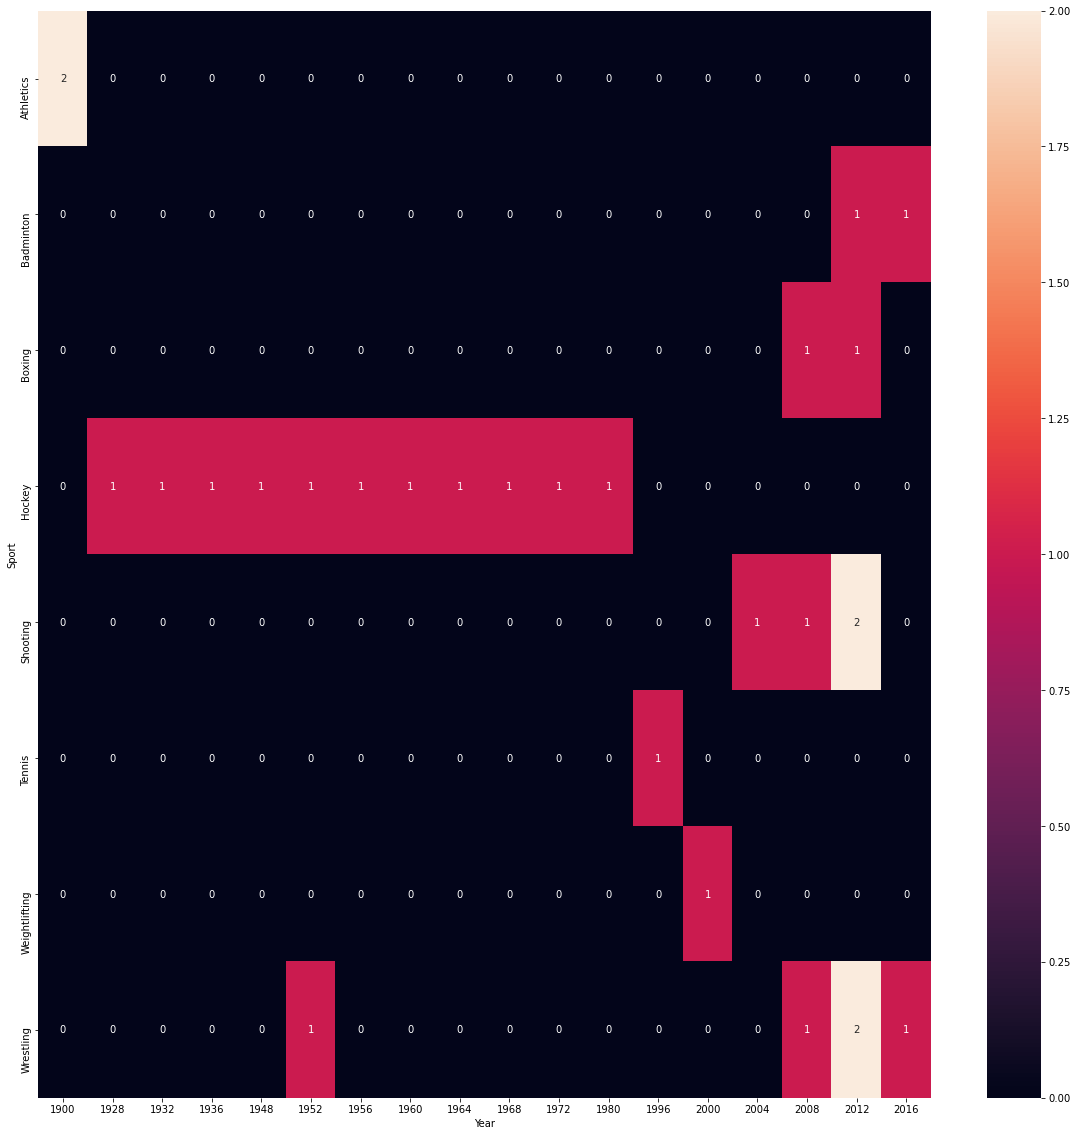

In [63]:
new_df=temp_df[temp_df['region']=='India']
plt.figure(figsize=(20,20))
sns.heatmap(new_df.pivot_table(index='Sport',columns='Year',values='Medal',aggfunc='count').fillna(0),annot=True)

In [64]:
def most_succesful(df,country):
    temp_df = df.dropna(subset=['Medal'])
    
    temp_df=temp_df[temp_df['region']==country]
        
    x= temp_df['Name'].value_counts().reset_index().head(15).merge(df, left_on='index', right_on='Name', how='left')[
        ['index', 'Name_x', 'Sport']].drop_duplicates('index')
    x.rename(columns={'index': 'Name', 'Name_x': 'Medals'}, inplace=True)
    return x

In [65]:
most_succesful(df,'India')

Name  Medals   Sport
0                    Udham Singh Kular       4  Hockey
4               Leslie Walter Claudius       4  Hockey
8                     Dhyan Chand Bais       3  Hockey
11           Victor John "V. J." Peter       3  Hockey
14                        Balbir Singh       3  Hockey
17                 Richard James Allen       3  Hockey
20                     Prithipal Singh       3  Hockey
23                 Ranganathan Francis       3  Hockey
26                Randhir Singh Gentle       3  Hockey
29              Harbinder Singh Chimni       3  Hockey
32               Shankar Pillay Laxman       3  Hockey
35           Balbir Singh Dosanjh, Sr.       3  Hockey
38              Leslie Charles Hammond       2  Hockey
40  Grahanandan Nandy "G. Nandy" Singh       2  Hockey
42                Broome Eric Pinniger       2  Hockey

# Athlete Analysis

In [66]:
import plotly.figure_factory as ff

In [67]:
athlete_df = df.drop_duplicates(subset=['Name','region'])

In [68]:
athlete_df.head(3)

ID                 Name Sex   Age  Height  Weight     Team  NOC  \
0   1            A Dijiang   M  24.0   180.0    80.0    China  CHN   
1   2             A Lamusi   M  23.0   170.0    60.0    China  CHN   
2   3  Gunnar Nielsen Aaby   M  24.0     NaN     NaN  Denmark  DEN   

         Games  Year  Season       City       Sport  \
0  1992 Summer  1992  Summer  Barcelona  Basketball   
1  2012 Summer  2012  Summer     London        Judo   
2  1920 Summer  1920  Summer  Antwerpen    Football   

                          Event Medal   region notes  Bronze  Gold  Silver  
0   Basketball Men's Basketball   NaN    China   NaN       0     0       0  
1  Judo Men's Extra-Lightweight   NaN    China   NaN       0     0       0  
2       Football Men's Football   NaN  Denmark   NaN       0     0       0

In [69]:
x1 = athlete_df['Age'].dropna()
x2 = athlete_df[athlete_df['Medal']=='Gold']['Age'].dropna()
x3 = athlete_df[athlete_df['Medal']=='Silver']['Age'].dropna()
x4 = athlete_df[athlete_df['Medal']=='Bronze']['Age'].dropna()

In [70]:
fig = ff.create_distplot([x1,x2,x3,x4],['Overall Age','Gold Medalist','Silver Medalst','Bronze Medalist'],show_hist=False,show_rug=False)
fig.show()

In [77]:
x = []
name = []
famous_sports = ['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Athletics',
                     'Swimming', 'Badminton', 'Sailing', 'Gymnastics',
                     'Art Competitions', 'Handball', 'Weightlifting', 'Wrestling',
                     'Water Polo', 'Hockey', 'Rowing', 'Fencing',
                     'Shooting', 'Boxing', 'Taekwondo', 'Cycling', 'Diving', 'Canoeing',
                     'Tennis', 'Golf', 'Softball', 'Archery',
                     'Volleyball', 'Synchronized Swimming', 'Table Tennis', 'Baseball',
                     'Rhythmic Gymnastics', 'Rugby Sevens',
                     'Beach Volleyball', 'Triathlon', 'Rugby', 'Polo', 'Ice Hockey']

In [78]:

for sport in famous_sports:
    temp_df = athlete_df[athlete_df['Sport'] == sport]
    x.append(temp_df[temp_df['Medal'] == 'Gold']['Age'].dropna())
    name.append(sport)

In [79]:
fig = ff.create_distplot(x, name, show_hist=False, show_rug=False)

In [80]:
fig.show()